This is an attempt to determine unobserved allocation parameters by optimization.

In [1]:
include("../src/optimize-surface.jl")

Loading from saved region network...


Loading from saved water network...
Optimize a model with 28777 rows, 46305 columns and 1815135 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e-02, 1e-02]
  Bounds range    [0e+00, 0e+00]
  RHS range       [1e-02, 3e+08]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 3492 rows and 4249 columns
Presolve time: 5.04s
Presolved: 25285 rows, 42056 columns, 1429311 nonzeros

Ordering time: 0.49s

Barrier performed 0 iterations in 7.29 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 6748 iterations and 7.79 seconds
Optimal objective  2.417289961e+04
 13.833209 seconds (1.98 M allocations: 143.979 MB, 1.23% gc time)
waterfromsupersource
[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2416.99203072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1097.8966889745686,0.0,0.0,0.0,

In [2]:
recorded = readtable("../data/extraction/USGS-2010.csv");

In [3]:
using RCall
R"library(ggplot2)"
R"library(PBSmapping)"
R"shapes <- importShapefile('../data/mapping/US_county_2000-simple')"
R"polydata <- attributes(shapes)$PolyData"
R"polydata$STATE <- as.numeric(levels(polydata$STATE))[polydata$STATE]"
R"polydata$COUNTY <- as.numeric(levels(polydata$COUNTY))[polydata$COUNTY]"
R"shapes$id <- polydata$STATE[shapes$PID] * 100 + polydata$COUNTY[shapes$PID] / 10";
R"names(shapes) <- tolower(names(shapes))";

-----------------------------------------------------------
PBS Mapping 2.69.76 -- Copyright (C) 2003-2016 Fisheries and Oceans Canada

PBS Mapping comes with ABSOLUTELY NO WARRANTY;
for details see the file COPYING.
This is free software, and you are welcome to redistribute
it under certain conditions, as outlined in the above file.

A complete user guide 'PBSmapping-UG.pdf' is located at 
/Library/Frameworks/R.framework/Versions/3.2/Resources/library/PBSmapping/doc/PBSmapping-UG.pdf

Packaged on 2015-04-23
Pacific Biological Station, Nanaimo

All available PBS packages can be found at
http://code.google.com/p/pbs-software/

To see demos, type '.PBSfigs()'.
-----------------------------------------------------------


Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Loading 

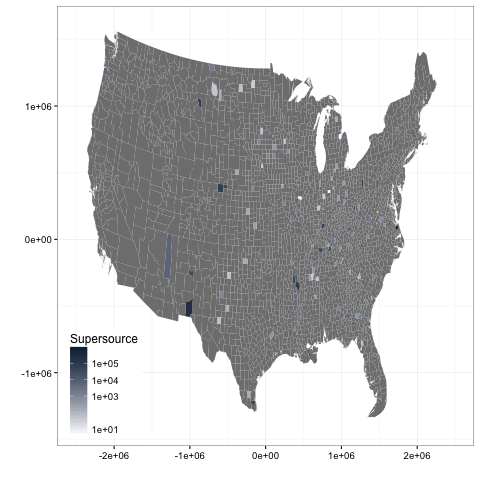

RCall.RObject{RCall.VecSxp}


In [4]:
recorded[:supersource] = sol.sol[1:varlens[1]]
R"ggplot($recorded, aes(fill=supersource)) + geom_map(aes(map_id=FIPS), map=shapes) +
expand_limits(x=c(-2500000, 2500000), y=c(-1.4e6, 1.6e6)) +
scale_fill_gradient(name='Supersource', trans='log', low='white', high='#132B43', breaks=c(1, 10, 1e3, 1e4, 1e5, 1e6)) +
theme_bw() + theme(legend.justification=c(0,0), legend.position=c(0,0)) + xlab('') + ylab('')"